# Data Analysis

In [ ]:
import pandas as pd
import numpy as np

Restaurant_Data = pd.read_csv("/Users/student/Downloads/yelp_dataset/Processed_Restaurant_Data")

In [2]:
Restaurant_Data.head()

,rating_for_business,is_open,no_of_reviews_for_business,business_name,business_id,no_of_cool_reviews_by_user,no_of_funny_reviews_by_user,user_id,no_of_reviews_by_user,compliment_photos,...,NoiseLevel,GoodForKids,OutdoorSeating,HasTV,Alcohol,RestaurantsGoodForGroups,BikeParking,WiFi,year,day_of_the_week
0,4.0,1,389,Helena Avenue Bakery,IDtLPgUrqorrpqSLdfMhZQ,14336,11441,5BpJEC8YVi80ecWT5CtlfQ,2739,1139,...,1,2,2,1,0,2,2,2,2008,2
1,4.0,1,389,Helena Avenue Bakery,IDtLPgUrqorrpqSLdfMhZQ,1055,547,oH9K7eCuNsYr6MmlM2ZjUg,1465,10,...,1,2,2,1,0,2,2,2,2007,1
2,4.0,1,389,Helena Avenue Bakery,IDtLPgUrqorrpqSLdfMhZQ,7960,5636,SsgDGJWBNvefjY0z8XsVCQ,2349,152,...,1,2,2,1,0,2,2,2,2009,3
3,4.0,1,389,Helena Avenue Bakery,IDtLPgUrqorrpqSLdfMhZQ,722,496,M5CDadStKmQxLJPTBGBf0Q,488,17,...,1,2,2,1,0,2,2,2,2011,6
4,4.0,1,389,Helena Avenue Bakery,IDtLPgUrqorrpqSLdfMhZQ,268,164,Zi3Fm08v1sTMn4rktxci4g,194,9,...,1,2,2,1,0,2,2,2,2009,4


In [3]:
Restaurant_Data.shape

(162225, 36)

In [4]:
Restaurant_Data.dtypes

rating_for_business             float64
is_open                           int64
no_of_reviews_for_business        int64
business_name                    object
business_id                      object
no_of_cool_reviews_by_user        int64
no_of_funny_reviews_by_user       int64
user_id                          object
no_of_reviews_by_user             int64
compliment_photos                 int64
average_stars                   float64
compliment_hot                    int64
compliment_plain                  int64
compliment_more                   int64
compliment_funny                  int64
no_of_useful_reviews_by_user      int64
fans                              int64
compliment_note                   int64
compliment_cute                   int64
user_name                        object
rating_by_user                  float64
is_useful                         int64
is_cool                           int64
is_funny                          int64
text                             object


# Changing the type of rating_by_user column from float to int and looking at the correlations between each pairs.

In [5]:
numerical_columns = Restaurant_Data.select_dtypes(include=['int', 'float']).columns

# Calculate the correlation matrix for numerical columns only
correlation_matrix = Restaurant_Data[numerical_columns].corr()

# Flatten the correlation matrix and remove duplicates and self-correlations
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs != 1].drop_duplicates()

# Get the top 10 correlation pairs with their correlation values
top_36_correlation_pairs = correlation_pairs.head(50)

print("Top 36 correlation pairs of numerical features with their correlation values:")
print(top_36_correlation_pairs)

Top 36 correlation pairs of numerical features with their correlation values:
no_of_cool_reviews_by_user    no_of_useful_reviews_by_user    0.994352
                              no_of_funny_reviews_by_user     0.984139
no_of_funny_reviews_by_user   no_of_useful_reviews_by_user    0.976495
compliment_hot                compliment_funny                0.967427
compliment_note               compliment_funny                0.966008
is_cool                       is_useful                       0.945978
compliment_hot                compliment_note                 0.932832
compliment_photos             compliment_hot                  0.923449
                              compliment_funny                0.920703
is_cool                       is_funny                        0.918792
is_useful                     is_funny                        0.898240
compliment_photos             compliment_note                 0.888930
compliment_plain              compliment_note                 0.882871

# Looking at the correlation of every other varibale with the target variable

In [6]:
import pandas as pd

# Select the target feature (e.g., 'target_feature')
target_feature = 'rating_by_user'

numerical_columns = Restaurant_Data.select_dtypes(include=['int', 'float']).columns

# Compute Pearson correlation coefficients between the target feature and all other features
correlations = Restaurant_Data[numerical_columns].corr()[target_feature]
# Sort correlations in descending order (excluding the target feature itself)
top_correlated_features = correlations.drop(target_feature).sort_values(ascending=False)

# Display the top correlated feature(s)
print("Top correlated feature(s) with", target_feature, ":")
print(top_correlated_features.head())

Top correlated feature(s) with rating_by_user :
average_stars                 0.506634
rating_for_business           0.329461
no_of_reviews_for_business    0.086251
is_open                       0.076444
BikeParking                   0.046601
Name: rating_by_user, dtype: float64


# Removing one of the highly correlated features to deal with redundancy in the feature space and aim to simplify the model.

In [7]:
top_correlated_columns = ["no_of_cool_reviews_by_user", "no_of_funny_reviews_by_user", "compliment_photos", "compliment_note",
                         "compliment_funny", "is_funny", "compliment_plain", "fans", "is_cool"]
Restaurant_Data = Restaurant_Data.drop(columns = top_correlated_columns)
Restaurant_Data.shape

(162225, 27)

In [8]:
numerical_columns = Restaurant_Data.select_dtypes(include=['int', 'float']).columns

# Calculate the correlation matrix for numerical columns only
correlation_matrix = Restaurant_Data[numerical_columns].corr()

# Flatten the correlation matrix and remove duplicates and self-correlations
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs != 1].drop_duplicates()

# Get the top 10 correlation pairs with their correlation values
top_10_correlation_pairs = correlation_pairs.head(10)

print("Top 36 correlation pairs of numerical features with their correlation values:")
print(top_10_correlation_pairs)

Top 36 correlation pairs of numerical features with their correlation values:
compliment_more               compliment_hot                  0.762868
compliment_cute               compliment_more                 0.745196
compliment_more               no_of_useful_reviews_by_user    0.717642
compliment_cute               compliment_hot                  0.678153
no_of_reviews_by_user         no_of_useful_reviews_by_user    0.671188
compliment_hot                no_of_useful_reviews_by_user    0.634690
is_useful                     compliment_hot                  0.558246
                              no_of_useful_reviews_by_user    0.523763
rating_by_user                average_stars                   0.506634
no_of_useful_reviews_by_user  compliment_cute                 0.475401
dtype: float64


In [9]:
Restaurant_Data = Restaurant_Data.drop_duplicates()

Restaurant_Data.shape

(162210, 27)

In [10]:
Restaurant_Data.dtypes

rating_for_business             float64
is_open                           int64
no_of_reviews_for_business        int64
business_name                    object
business_id                      object
user_id                          object
no_of_reviews_by_user             int64
average_stars                   float64
compliment_hot                    int64
compliment_more                   int64
no_of_useful_reviews_by_user      int64
compliment_cute                   int64
user_name                        object
rating_by_user                  float64
is_useful                         int64
text                             object
RestaurantsTakeOut                int64
NoiseLevel                        int64
GoodForKids                       int64
OutdoorSeating                    int64
HasTV                             int64
Alcohol                           int64
RestaurantsGoodForGroups          int64
BikeParking                       int64
WiFi                              int64


Possible columns containing Outliers:

1) no_of_reviews_for_business
2) no_of_reviews_by_user
3) average_stars
4) compliment_hot
5) compliment_more
6) no_of_useful_reviews_by_user
7) compliment_cute
8) rating_by_user

# Summaries of the Numerical Features

In [11]:
Summary_columns = ['no_of_reviews_for_business', "no_of_reviews_by_user", "average_stars", "compliment_hot", 
                  "compliment_more", "no_of_useful_reviews_by_user", "compliment_cute", "rating_by_user"]

In [22]:
summary = Restaurant_Data.describe(include='all')
print(summary)

        rating_for_business        is_open  no_of_reviews_for_business  \
count         162210.000000  162210.000000               162210.000000   
unique                  NaN            NaN                         NaN   
top                     NaN            NaN                         NaN   
freq                    NaN            NaN                         NaN   
mean               3.975495       0.802959                  753.426996   
std                0.485645       0.397765                  792.236516   
min                1.500000       0.000000                    5.000000   
25%                3.500000       1.000000                  234.000000   
50%                4.000000       1.000000                  492.000000   
75%                4.500000       1.000000                 1018.000000   
max                5.000000       1.000000                 3834.000000   

       business_name             business_id                 user_id  \
count         162210                  1

columns containing outliers :

2) no_of_reviews_by_user
3) compliment_hot
4) compliment_more
5) no_of_useful_reviews_by_user
6) compliment_cute

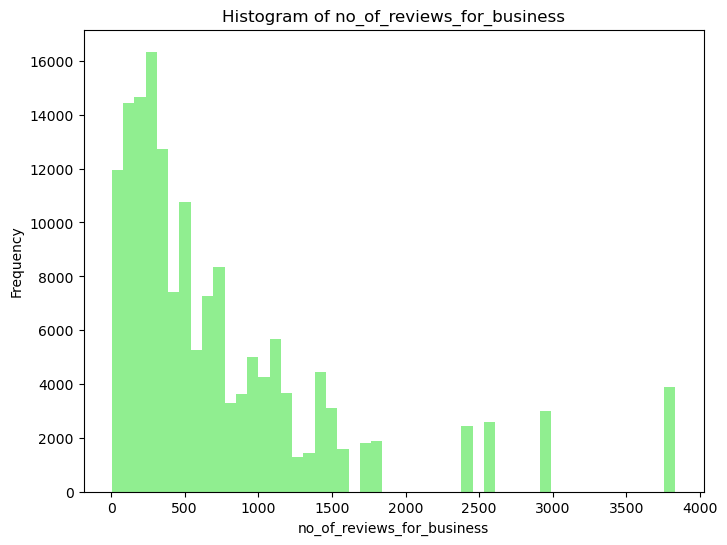

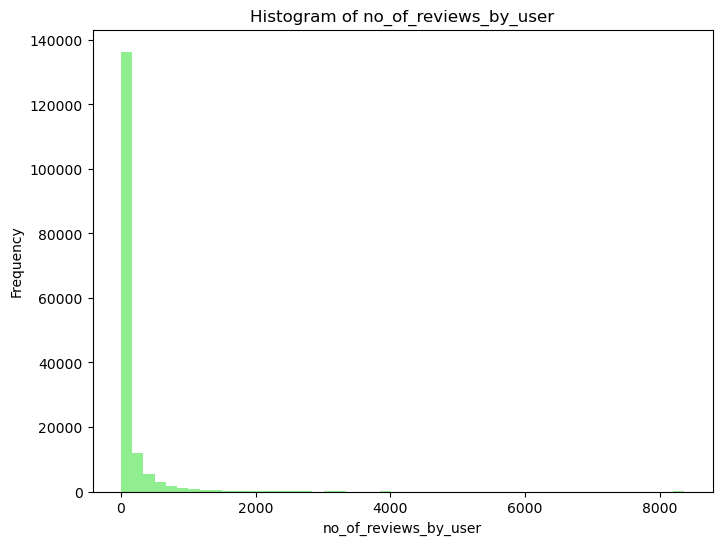

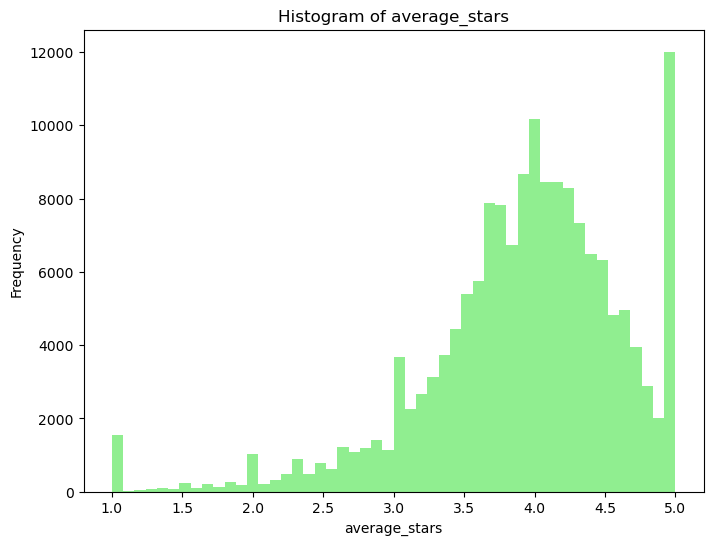

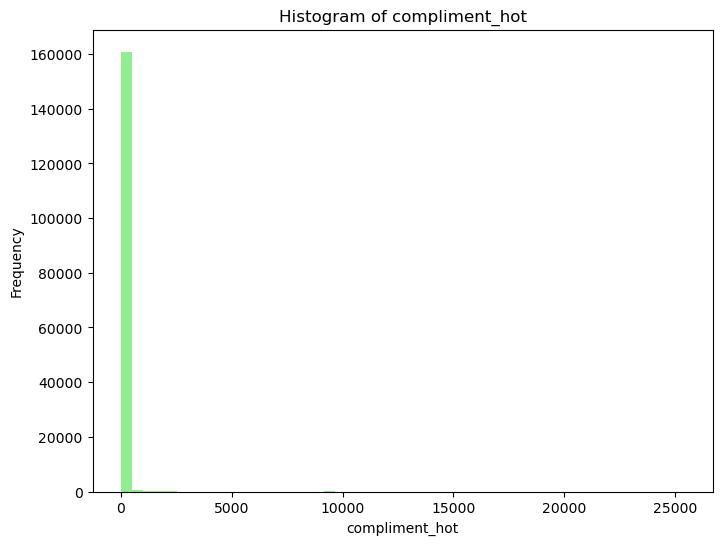

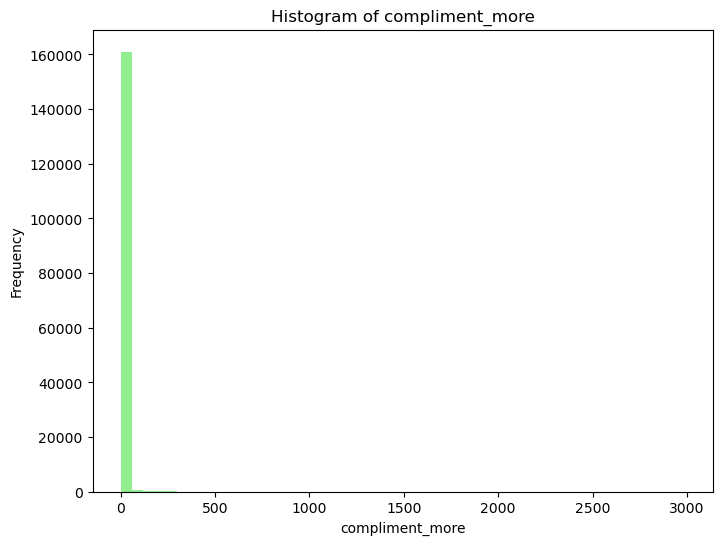

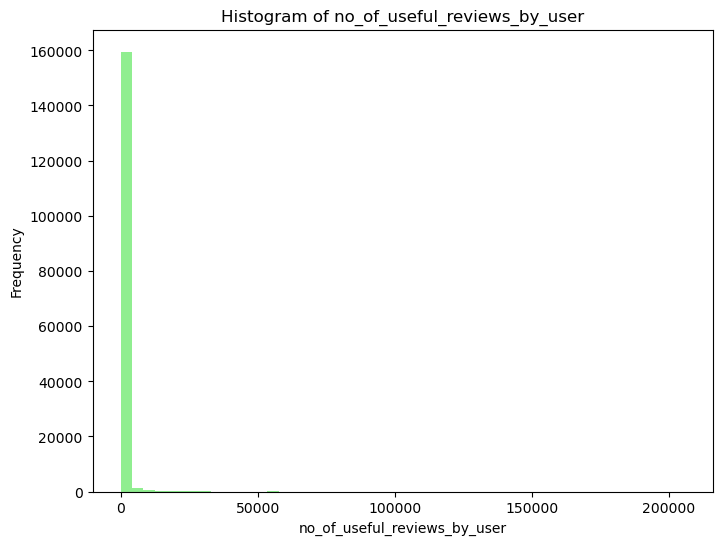

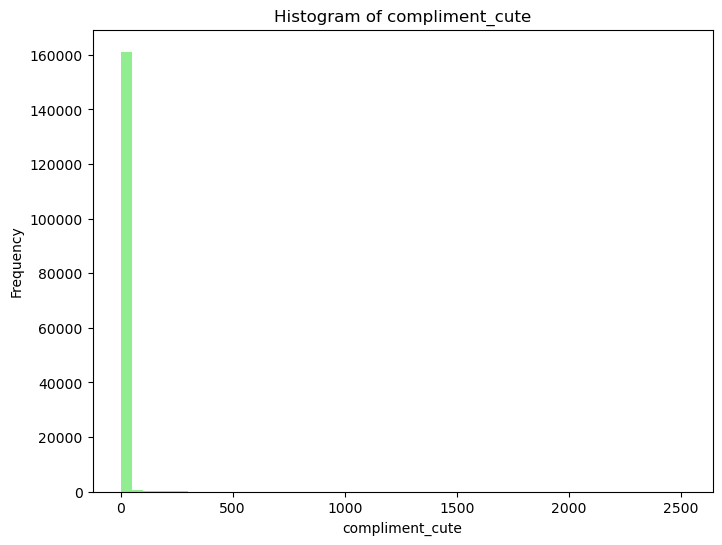

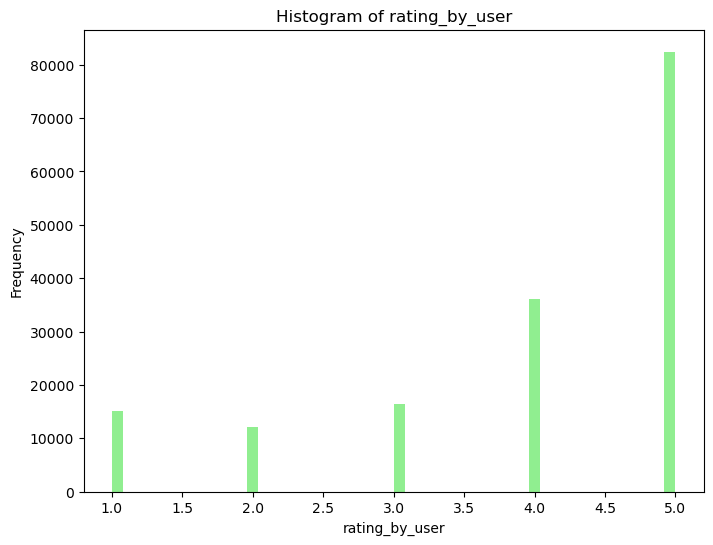

In [21]:
import matplotlib.pyplot as plt

for column in Restaurant_Data[Summary_columns].columns:
    plt.figure(figsize=(8, 6))
    if Restaurant_Data[column].dtype == 'object':  # Categorical columns
        distribution = Restaurant_Data[column].value_counts()
        distribution.plot(kind='bar', color='skyblue')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title('Distribution of ' + column)
        plt.show()
    else:  # Numerical columns
        plt.hist(Restaurant_Data[column], bins=50, color='lightgreen')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title('Histogram of ' + column)
        plt.show()

# Percentile method to Eliminate Outliers

In [23]:
columns_with_outliers = ['no_of_reviews_by_user', 'compliment_hot', 'compliment_more', 'no_of_useful_reviews_by_user', 'compliment_cute']

In [25]:
filtered_df = Restaurant_Data.copy()  # Create a copy of the DataFrame

for column in Restaurant_Data[columns_with_outliers].select_dtypes(include=['float64', 'int64']).columns:
    lower_percentile = Restaurant_Data[column].quantile(0.01)  # 1st percentile
    upper_percentile = Restaurant_Data[column].quantile(0.99)  # 99th percentile
    filtered_df = filtered_df[(Restaurant_Data[column] >= lower_percentile) & (Restaurant_Data[column] <= upper_percentile)]

/var/folders/bw/y2d1hfmn7kv6kjtp5j0hlbtm0000gn/T/ipykernel_65682/924442500.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(Restaurant_Data[column] >= lower_percentile) & (Restaurant_Data[column] <= upper_percentile)]
/var/folders/bw/y2d1hfmn7kv6kjtp5j0hlbtm0000gn/T/ipykernel_65682/924442500.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(Restaurant_Data[column] >= lower_percentile) & (Restaurant_Data[column] <= upper_percentile)]
/var/folders/bw/y2d1hfmn7kv6kjtp5j0hlbtm0000gn/T/ipykernel_65682/924442500.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(Restaurant_Data[column] >= lower_percentile) & (Restaurant_Data[column] <= upper_percentile)]
/var/folders/bw/y2d1hfmn7kv6kjtp5j0hlbtm0000gn/T/ipykernel_65682/924442500.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f

In [26]:
filtered_df.shape

(158978, 27)

In [27]:
import pandas as pd

Restaurant_Data = filtered_df.copy()

# Select the target feature (e.g., 'target_feature')
target_feature = 'rating_by_user'

numerical_columns = Restaurant_Data.select_dtypes(include=['int', 'float']).columns

# Compute Pearson correlation coefficients between the target feature and all other features
correlations = Restaurant_Data[numerical_columns].corr()[target_feature]
# Sort correlations in descending order (excluding the target feature itself)
top_correlated_features = correlations.drop(target_feature).sort_values(ascending=False)

# Display the top correlated feature(s)
print("Top correlated feature(s) with", target_feature, ":")
print(top_correlated_features.head())

Top correlated feature(s) with rating_by_user :
average_stars                 0.508579
rating_for_business           0.329585
no_of_reviews_for_business    0.086716
is_open                       0.076233
BikeParking                   0.046453
Name: rating_by_user, dtype: float64


In [32]:
Business_columns = ['rating_for_business', 'is_open', 'no_of_reviews_for_business', 'business_name', 'business_id',
                    'RestaurantsTakeOut',  'NoiseLevel', 'GoodForKids', 'OutdoorSeating', 'HasTV',
                    'Alcohol', 'RestaurantsGoodForGroups', 'BikeParking', 'WiFi', 'year']

user_columns = ['user_id', 'no_of_reviews_by_user', 'compliment_hot', 'compliment_more', 'no_of_useful_reviews_by_user', 'compliment_cute',
                'user_name', 'average_stars']

target_column =  ['rating_by_user']

In [33]:
Restaurant_Data = pd.concat([Restaurant_Data[user_columns], Restaurant_Data[Business_columns], Restaurant_Data[target_column]], axis = 1)
Restaurant_Data.shape

(158978, 24)

In [34]:
csv_file_path = '/Users/student/Downloads/yelp_dataset/Final_Restaurant_Data'

# Save the DataFrame to a CSV file
Restaurant_Data.to_csv(csv_file_path, index=False)

print("DataFrame saved to", csv_file_path)

DataFrame saved to /Users/student/Downloads/yelp_dataset/Final_Restaurant_Data
